In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/^N225.csv')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,23427.900391,23463.890625,23317.320313,23343.509766,23343.509766,62400000
1,2020-01-28,23126.929688,23243.359375,23115.150391,23215.710938,23215.710938,64400000
2,2020-01-29,23309.320313,23392.609375,23214.279297,23379.400391,23379.400391,54900000
3,2020-01-30,23284.580078,23318.570313,22892.949219,22977.750000,22977.750000,69600000
4,2020-01-31,23148.919922,23421.589844,23139.980469,23205.179688,23205.179688,75400000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
702,2022-12-12,27741.099609,27865.720703,27734.660156,27842.330078,27842.330078,49600000
703,2022-12-13,28067.369141,28116.560547,27907.490234,27954.849609,27954.849609,51900000
704,2022-12-14,28005.029297,28195.689453,27993.779297,28156.210938,28156.210938,54800000
705,2022-12-15,27991.140625,28163.169922,27987.539063,28051.699219,28051.699219,51100000
706,2022-12-16,27706.699219,27713.039063,27488.830078,27527.119141,27527.119141,83800000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,707.000000,707.000000,707.000000,707.000000,707.000000,7.070000e+02
mean,26328.419405,26477.735961,26162.531664,26326.129605,26326.129605,7.370651e+07
std,3024.537068,3012.432713,3041.154231,3023.511612,3023.511612,2.263997e+07
min,16570.570313,17049.029297,16358.190430,16552.830078,16552.830078,0.000000e+00
25%,23588.304688,23688.319336,23503.519532,23610.734375,23610.734375,6.005000e+07
50%,27351.800781,27504.800781,27250.699219,27413.880859,27413.880859,7.010000e+07
75%,28524.795899,28682.054688,28394.084961,28521.219727,28521.219727,8.165000e+07
max,30606.150391,30795.779297,30504.810547,30670.099609,30670.099609,2.334000e+08


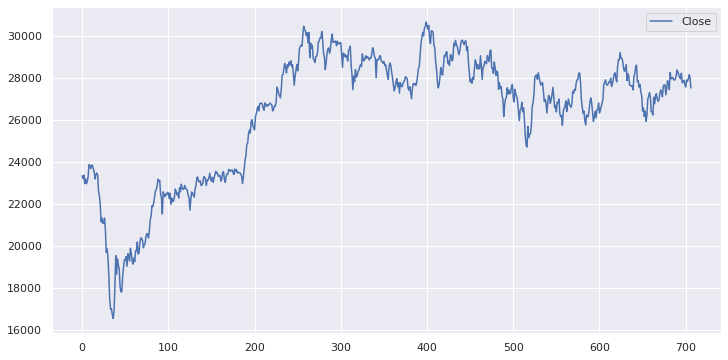

In [6]:
df[['Close']].plot(figsize=(12,6));


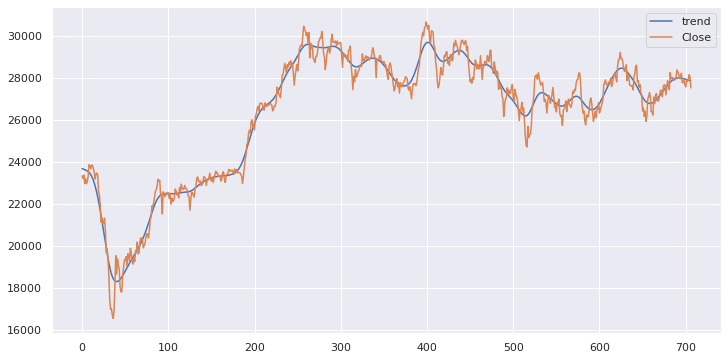

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.7370045191851633,
 0.4121545004926884,
 2,
 704,
 {'1%': -3.4396728750301966,
  '5%': -2.8656541974330936,
  '10%': -2.5689608949670713},
 9960.34982177772)

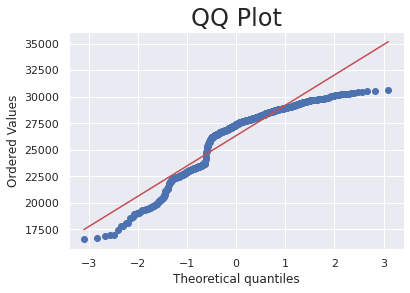

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


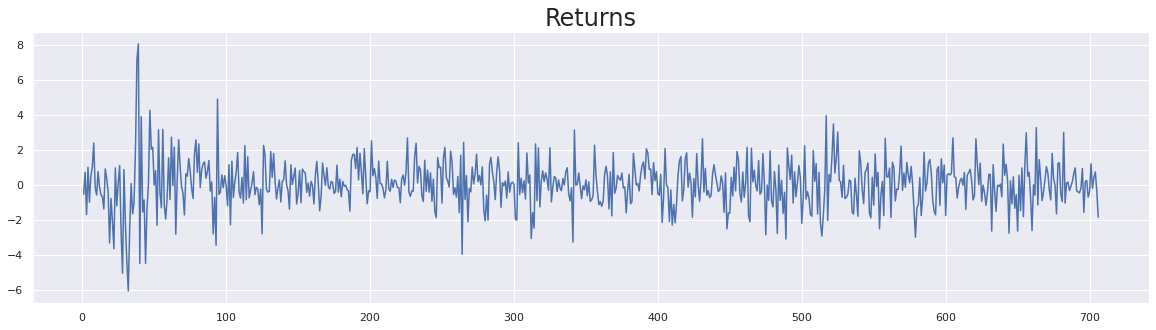

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


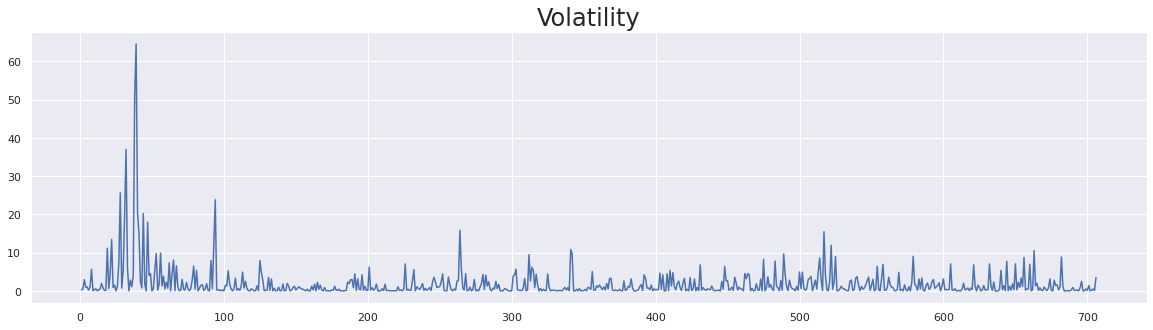

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

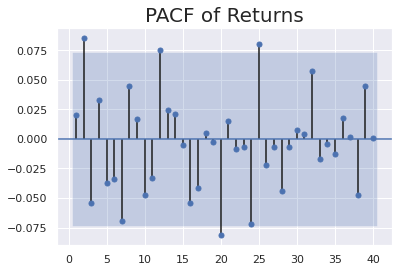

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

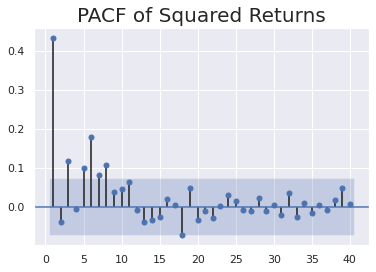

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 21.0 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6802407665.942074
Iteration:      2,   Func. Count:     12,   Neg. LLF: 371687205.9575157
Iteration:      3,   Func. Count:     18,   Neg. LLF: 1289.635987929878
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1195.9034313027573
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1195.903427516081
Iteration:      6,   Func. Count:     32,   Neg. LLF: 1195.9034275160839
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1195.903427516081
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1195.90
Distribution:                  Normal   AIC:                           2397.81
Method:            Maximum Likelihood   BIC:                           2411.49
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:11   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0445  4.609e-02      0.966      0.334 [-4.580e-02,  0.135]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.3868      0.111     12.490  8.441e-36 [  1.169,  1.604]
alpha[1]       0.2454  7.332e-02      3.348  8.152e-04 [  0.102,  0.389]
========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 1195.337202642832
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1194.4888699535659
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1194.49
Distribution:                  Normal   AIC:                           2396.98
Method:            Maximum Likelihood   BIC:                           2415.22
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:11   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0614  4.923e-02      1.247      0.213 [-3.512e-02,  0.158]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.2810      0.125     10.231  1.434e-24    [  1.036,  1.526]
alpha[1]       0.2427  7.560e-02      3.211  1.325e-03  [9.454e-02,  0.391]
alpha[2]       0.0666  4.988e-02      1.336      0.182 [-3.112e-02,  0.164]
===========================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1229.178130302458
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1186.4965754110326
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1186.4965754110326
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1186.50
Distribution:                  Normal   AIC:                           2382.99
Method:            Maximum Likelihood   BIC:                           2405.79
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:11   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0485  4.572e-02      1.061      0.289 [-4.109e-02,  0.138]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0977      0.125      8.752  2.103e-18    [  0.852,  1.344]
alpha[1]       0.2150  7.040e-02      3.055  2.253e-03  [7.706e-02,  0.353]
alpha[2]       0.0643  4.775e-02      1.346      0.178 [-2.931e-02,  0.158]
alpha[3]       0.1240  4.885e-02      2.538  1.114e-02  [2.825e-02,  0.220]
===========================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     88,   Neg. LLF: 1232.6619411052473
Iteration:     10,   Func. Count:    175,   Neg. LLF: 1183.4485600166395
Iteration:     15,   Func. Count:    261,   Neg. LLF: 1195.9572019654331
Iteration:     20,   Func. Count:    345,   Neg. LLF: 1173.3186953573745
Iteration:     25,   Func. Count:    427,   Neg. LLF: 1173.0990744981207
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1173.0990744981207
            Iterations: 25
            Function evaluations: 427
            Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1173.10
Distribution:                  Normal   AIC:                           2376.20
Method:            Maximum Likelihood   BIC:                           2444.59
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:11   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0602  4.709e-02      1.278      0.201 [-3.210e-02,  0.153]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.7303      0.179      4.084  4.422e-05      [  0.380,  1.081]
alpha[1]       0.1582  5.408e-02      2.925  3.448e-03    [5.217e-02,  0.264]
alpha[2]       0.0502  4.676e-02      1.074      0.283   [-4.145e-02,  0.142]
alpha[3]       0.0635  5.586e-02      1.137      0.256   [-4.597e-02,  0.173]
alpha[4]   1.2571e-03  4.184e-02  3.005e-02      0.976 [-8.075e-02,8.326e-02]
alpha[5]       0.0238  4.604e-02      0.517      0.605   [-6.643e-02,  0.114]
alpha[6]       0.0563  5.094e-02      1.105      0.269   [-4.353e-02,  0.156]
alpha[7]   1.7669e-12  5.329e-02  3.316e-11      1.000      [ -0.104,  0.104]
alpha[8]       0.0133  3.613e-02      0.368      0.713 [-5.753e-02,8.411e-02]
alpha[9]   1.1909e-12  3.880e-02  3.070e-11      1.000 [-7.604e-02,7.604e-02]
alpha[10]      0.0502  5.171e-02      0.971      0.332   [-5.115e-02,  0.152]
alpha[11]      0.0806  5.818e-02      1.386      0.166   [-3.340e-02,  0.195]
alpha[12]      0.0862  5.673e-02      1.520      0.129   [-2.499e-02,  0.197]
alpha[13]      0.0000  5.190e-02      0.000      1.000      [ -0.102,  0.102]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1178.3231921082759
Iteration:     10,   Func. Count:     58,   Neg. LLF: 1178.2730866535069
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1178.2730866531629
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1178.27
Distribution:                  Normal   AIC:                           2364.55
Method:            Maximum Likelihood   BIC:                           2382.78
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0603  4.480e-02      1.347      0.178 [-2.746e-02,  0.148]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1392  8.802e-02      1.582      0.114 [-3.328e-02,  0.312]
alpha[1]       0.1083  4.453e-02      2.432  1.500e-02  [2.103e-02,  0.196]
beta[1]        0.8123  8.474e-02      9.586  9.163e-22    [  0.646,  0.978]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 2220.3125441406246
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1177.4305448005205
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1177.430327747357
            Iterations: 13
            Function evaluations: 90
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1177.43
Distribution:                  Normal   AIC:                           2364.86
Method:            Maximum Likelihood   BIC:                           2387.66
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0521  4.615e-02      1.129      0.259 [-3.835e-02,  0.143]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1640      0.109      1.511      0.131 [-4.873e-02,  0.377]
alpha[1]       0.1278  5.025e-02      2.543  1.099e-02  [2.930e-02,  0.226]
beta[1]        0.4068      0.186      2.191  2.844e-02  [4.292e-02,  0.771]
beta[2]        0.3702      0.195      1.896  5.800e-02 [-1.255e-02,  0.753]
===========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1178.2587433556796
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1177.0272882232823
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1177.0272714536518
            Iterations: 12
            Function evaluations: 96
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1177.03
Distribution:                  Normal   AIC:                           2366.05
Method:            Maximum Likelihood   BIC:                           2393.41
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0532  4.808e-02      1.106      0.269 [-4.104e-02,  0.147]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1673      0.114      1.467      0.142 [-5.621e-02,  0.391]
alpha[1]       0.1385  5.270e-02      2.627  8.603e-03  [3.518e-02,  0.242]
beta[1]        0.2940      0.386      0.762      0.446    [ -0.463,  1.051]
beta[2]        0.2470      0.382      0.646      0.518    [ -0.502,  0.996]
beta[3]        0.2223      0.227      0.979      0.328    [ -0.223,  0.667]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1178.3134003428013
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1178.2730867444811
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1178.2730867443288
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1178.27
Distribution:                  Normal   AIC:                           2366.55
Method:            Maximum Likelihood   BIC:                           2389.34
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0603  4.784e-02      1.261      0.207 [-3.343e-02,  0.154]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1392      0.183      0.759      0.448   [ -0.220,  0.499]
alpha[1]       0.1083  4.255e-02      2.546  1.091e-02 [2.492e-02,  0.192]
alpha[2]   1.7305e-16      0.120  1.444e-15      1.000   [ -0.235,  0.235]
beta[1]        0.8123      0.207      3.923  8.737e-05   [  0.407,  1.218]
==========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1640.5127206930968
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1178.2734198669232
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1178.273086429736
            Iterations: 13
            Function evaluations: 105
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1178.27
Distribution:                  Normal   AIC:                           2368.55
Method:            Maximum Likelihood   BIC:                           2395.90
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0604  4.666e-02      1.294      0.196 [-3.109e-02,  0.152]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1392      0.402      0.346      0.729    [ -0.649,  0.927]
alpha[1]       0.1083  4.251e-02      2.548  1.084e-02  [2.498e-02,  0.192]
alpha[2]   2.6253e-13      0.126  2.080e-12      1.000    [ -0.247,  0.247]
alpha[3]       0.0000      0.134      0.000      1.000    [ -0.262,  0.262]
beta[1]        0.8123      0.449      1.811  7.015e-02 [-6.685e-02,  1.692]
===========================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 44102969778.169876
Iteration:     10,   Func. Count:     78,   Neg. LLF: 1168.2904903291949
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1168.2904857584708
            Iterations: 12
            Function evaluations: 89
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -1168.29
Distribution:                  Normal   AIC:                           2346.58
Method:            Maximum Likelihood   BIC:                           2369.38
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0157  4.546e-02      0.345      0.730 [-7.343e-02,  0.105]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0254  1.585e-02      1.601      0.109 [-5.687e-03,5.646e-02]
alpha[1]       0.1372  6.434e-02      2.132  3.302e-02    [1.106e-02,  0.263]
gamma[1]      -0.1123  3.146e-02     -3.568  3.601e-04   [ -0.174,-5.058e-02]
beta[1]        0.9534  2.450e-02     38.913      0.000      [  0.905,  1.001]
=============================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1164.29
Distribution:                  Normal   AIC:                           2338.57
Method:            Maximum Likelihood   BIC:                           2361.37
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0172  4.443e-02      0.387      0.699 [-6.989e-02,  0.104]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1063  5.729e-02      1.856  6.350e-02   [-5.976e-03,  0.219]
alpha[1]   9.5031e-15  3.005e-02  3.162e-13      1.000 [-5.890e-02,5.890e-02]
gamma[1]       0.1669  5.381e-02      3.102  1.920e-03    [6.147e-02,  0.272]
beta[1]        0.8566  7.203e-02     11.893  1.293e-32      [  0.715,  0.998]
=============================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 1175.3753692641226
Iteration:     10,   Func. Count:     77,   Neg. LLF: 1165.1859407485767
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1165.1855734934704
            Iterations: 14
            Function evaluations: 100
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -1165.19
Distribution:                  Normal   AIC:                           2340.37
Method:            Maximum Likelihood   BIC:                           2363.17
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:12   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         3.5654e-03  4.555e-02  7.827e-02      0.938 [-8.571e-02,9.284e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0764  3.393e-02      2.251  2.441e-02    [9.862e-03,  0.143]
alpha[1]   4.6030e-03  2.501e-02      0.184      0.854 [-4.442e-02,5.363e-02]
gamma[1]       0.1413  3.671e-02      3.850  1.182e-04    [6.937e-02,  0.213]
beta[1]        0.8840  4.471e-02     19.774  4.984e-87      [  0.796,  0.972]
=============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 1183.4370288332404
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1179.903336744066
Iteration:     15,   Func. Count:    102,   Neg. LLF: 1179.8559944157078
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1179.8559944157078
            Iterations: 16
            Function evaluations: 107
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -1179.86
Distribution:                  Normal   AIC:                           2369.71
Method:            Maximum Likelihood   BIC:                           2392.51
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:13   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0563  4.564e-02      1.234      0.217 [-3.315e-02,  0.146]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1093      0.282      0.387      0.699 [ -0.444,  0.662]
phi            0.3854      0.300      1.286      0.199 [ -0.202,  0.973]
d              0.2292      0.253      0.906      0.365 [ -0.267,  0.725]
beta           0.4614      0.470      0.982      0.326 [ -0.459,  1.382]
========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1304.975204361112
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1195.9651195329047
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1195.90342752248
            Iterations: 14
            Function evaluations: 73
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -1195.90
Distribution:                  Normal   AIC:                           2397.81
Method:            Maximum Likelihood   BIC:                           2411.49
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:13   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0445  4.609e-02      0.966      0.334 [-4.580e-02,  0.135]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          1.3868      0.111     12.490  8.437e-36 [  1.169,  1.604]
alpha[1]       0.2454  7.332e-02      3.348  8.151e-04 [  0.102,  0.389]
========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1361.8358625823041
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1164.2744721842096
Iteration:     15,   Func. Count:    120,   Neg. LLF: 1164.1920645084351
Iteration:     20,   Func. Count:    155,   Neg. LLF: 1164.1911652318831
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1164.1911652318831
            Iterations: 21
            Function evaluations: 161
            Gradient evaluations: 21


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -1164.19
Distribution:                  Normal   AIC:                           2340.38
Method:            Maximum Likelihood   BIC:                           2367.74
                                        No. Observations:                  706
Date:                Thu, Jan 26 2023   Df Residuals:                      705
Time:                        02:14:13   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0182  4.551e-02      0.400      0.689 [-7.101e-02,  0.107]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1109  5.730e-02      1.935  5.299e-02   [-1.429e-03,  0.223]
alpha[1]       0.0371  2.968e-02      1.250      0.211 [-2.107e-02,9.526e-02]
gamma[1]       0.9997  7.030e-02     14.220  6.865e-46      [  0.862,  1.137]
beta[1]        0.8531  5.159e-02     16.536  2.006e-61      [  0.752,  0.954]
delta          2.1496      0.954      2.253  2.424e-02      [  0.280,  4.019]
=============================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=130.51745350828085, pvalue=0.0)

In [46]:
jarque_bera_test.statistic

130.51745350828085

In [47]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1     -0.547470
2      0.705081
3     -1.717967
4      0.989782
5     -1.005121
         ...   
702   -0.210314
703    0.404131
704    0.720309
705   -0.371185
706   -1.870047
Name: returns, Length: 706, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=326.3996894070225, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

326.3996894070225

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

3.341314128483489

coef. asimetria

In [53]:
returns.skew()

0.19071070749446273

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -25.946
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -14.149
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.60 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -16.978
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.074
P-value                         0.729
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        707 non-null    object 
 1   Open        707 non-null    float64
 2   High        707 non-null    float64
 3   Low         707 non-null    float64
 4   Close       707 non-null    float64
 5   Adj Close   707 non-null    float64
 6   Volume      707 non-null    int64  
 7   trend       707 non-null    float64
 8   returns     706 non-null    float64
 9   sq_returns  706 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 55.4+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/^N225.csv")

In [66]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,23427.900391,23463.890625,23317.320313,23343.509766,23343.509766,62400000
1,2020-01-28,23126.929688,23243.359375,23115.150391,23215.710938,23215.710938,64400000
2,2020-01-29,23309.320313,23392.609375,23214.279297,23379.400391,23379.400391,54900000
3,2020-01-30,23284.580078,23318.570313,22892.949219,22977.750000,22977.750000,69600000
4,2020-01-31,23148.919922,23421.589844,23139.980469,23205.179688,23205.179688,75400000
...,...,...,...,...,...,...,...
702,2022-12-12,27741.099609,27865.720703,27734.660156,27842.330078,27842.330078,49600000
703,2022-12-13,28067.369141,28116.560547,27907.490234,27954.849609,27954.849609,51900000
704,2022-12-14,28005.029297,28195.689453,27993.779297,28156.210938,28156.210938,54800000
705,2022-12-15,27991.140625,28163.169922,27987.539063,28051.699219,28051.699219,51100000


In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

,Date,Close,Volume
0,2020-01-27,23343.509766,62400000
1,2020-01-28,23215.710938,64400000
2,2020-01-29,23379.400391,54900000
3,2020-01-30,22977.750000,69600000
4,2020-01-31,23205.179688,75400000
...,...,...,...
702,2022-12-12,27842.330078,49600000
703,2022-12-13,27954.849609,51900000
704,2022-12-14,28156.210938,54800000
705,2022-12-15,28051.699219,51100000


In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,23343.509766,62400000,23215.710938
1,2020-01-28,23215.710938,64400000,23379.400391
2,2020-01-29,23379.400391,54900000,22977.750000
3,2020-01-30,22977.750000,69600000,23205.179688
4,2020-01-31,23205.179688,75400000,22971.939453
...,...,...,...,...
702,2022-12-12,27842.330078,49600000,27954.849609
703,2022-12-13,27954.849609,51900000,28156.210938
704,2022-12-14,28156.210938,54800000,28051.699219
705,2022-12-15,28051.699219,51100000,27527.119141


In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2020-01-27,23343.509766,62400000,23215.710938
1,2020-01-28,23215.710938,64400000,23379.400391
2,2020-01-29,23379.400391,54900000,22977.750000
3,2020-01-30,22977.750000,69600000,23205.179688
4,2020-01-31,23205.179688,75400000,22971.939453
...,...,...,...,...
701,2022-12-09,27901.009766,70200000,27842.330078
702,2022-12-12,27842.330078,49600000,27954.849609
703,2022-12-13,27954.849609,51900000,28156.210938
704,2022-12-14,28156.210938,54800000,28051.699219


In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.48101934, 0.26735219, 0.47196668],
       [0.47196668, 0.27592117, 0.48356166],
       [0.48356166, 0.23521851, 0.45511066],
       ...,
       [0.80766465, 0.22236504, 0.82192812],
       [0.82192812, 0.23479006, 0.81452501],
       [0.81452501, 0.21893745, 0.77736626]])

In [73]:
price_volume_target_scaled_df.shape

(706, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((706, 2), (706, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((458, 2), (458, 1))

In [78]:
X_test.shape, y_test.shape

((248, 2), (248, 1))

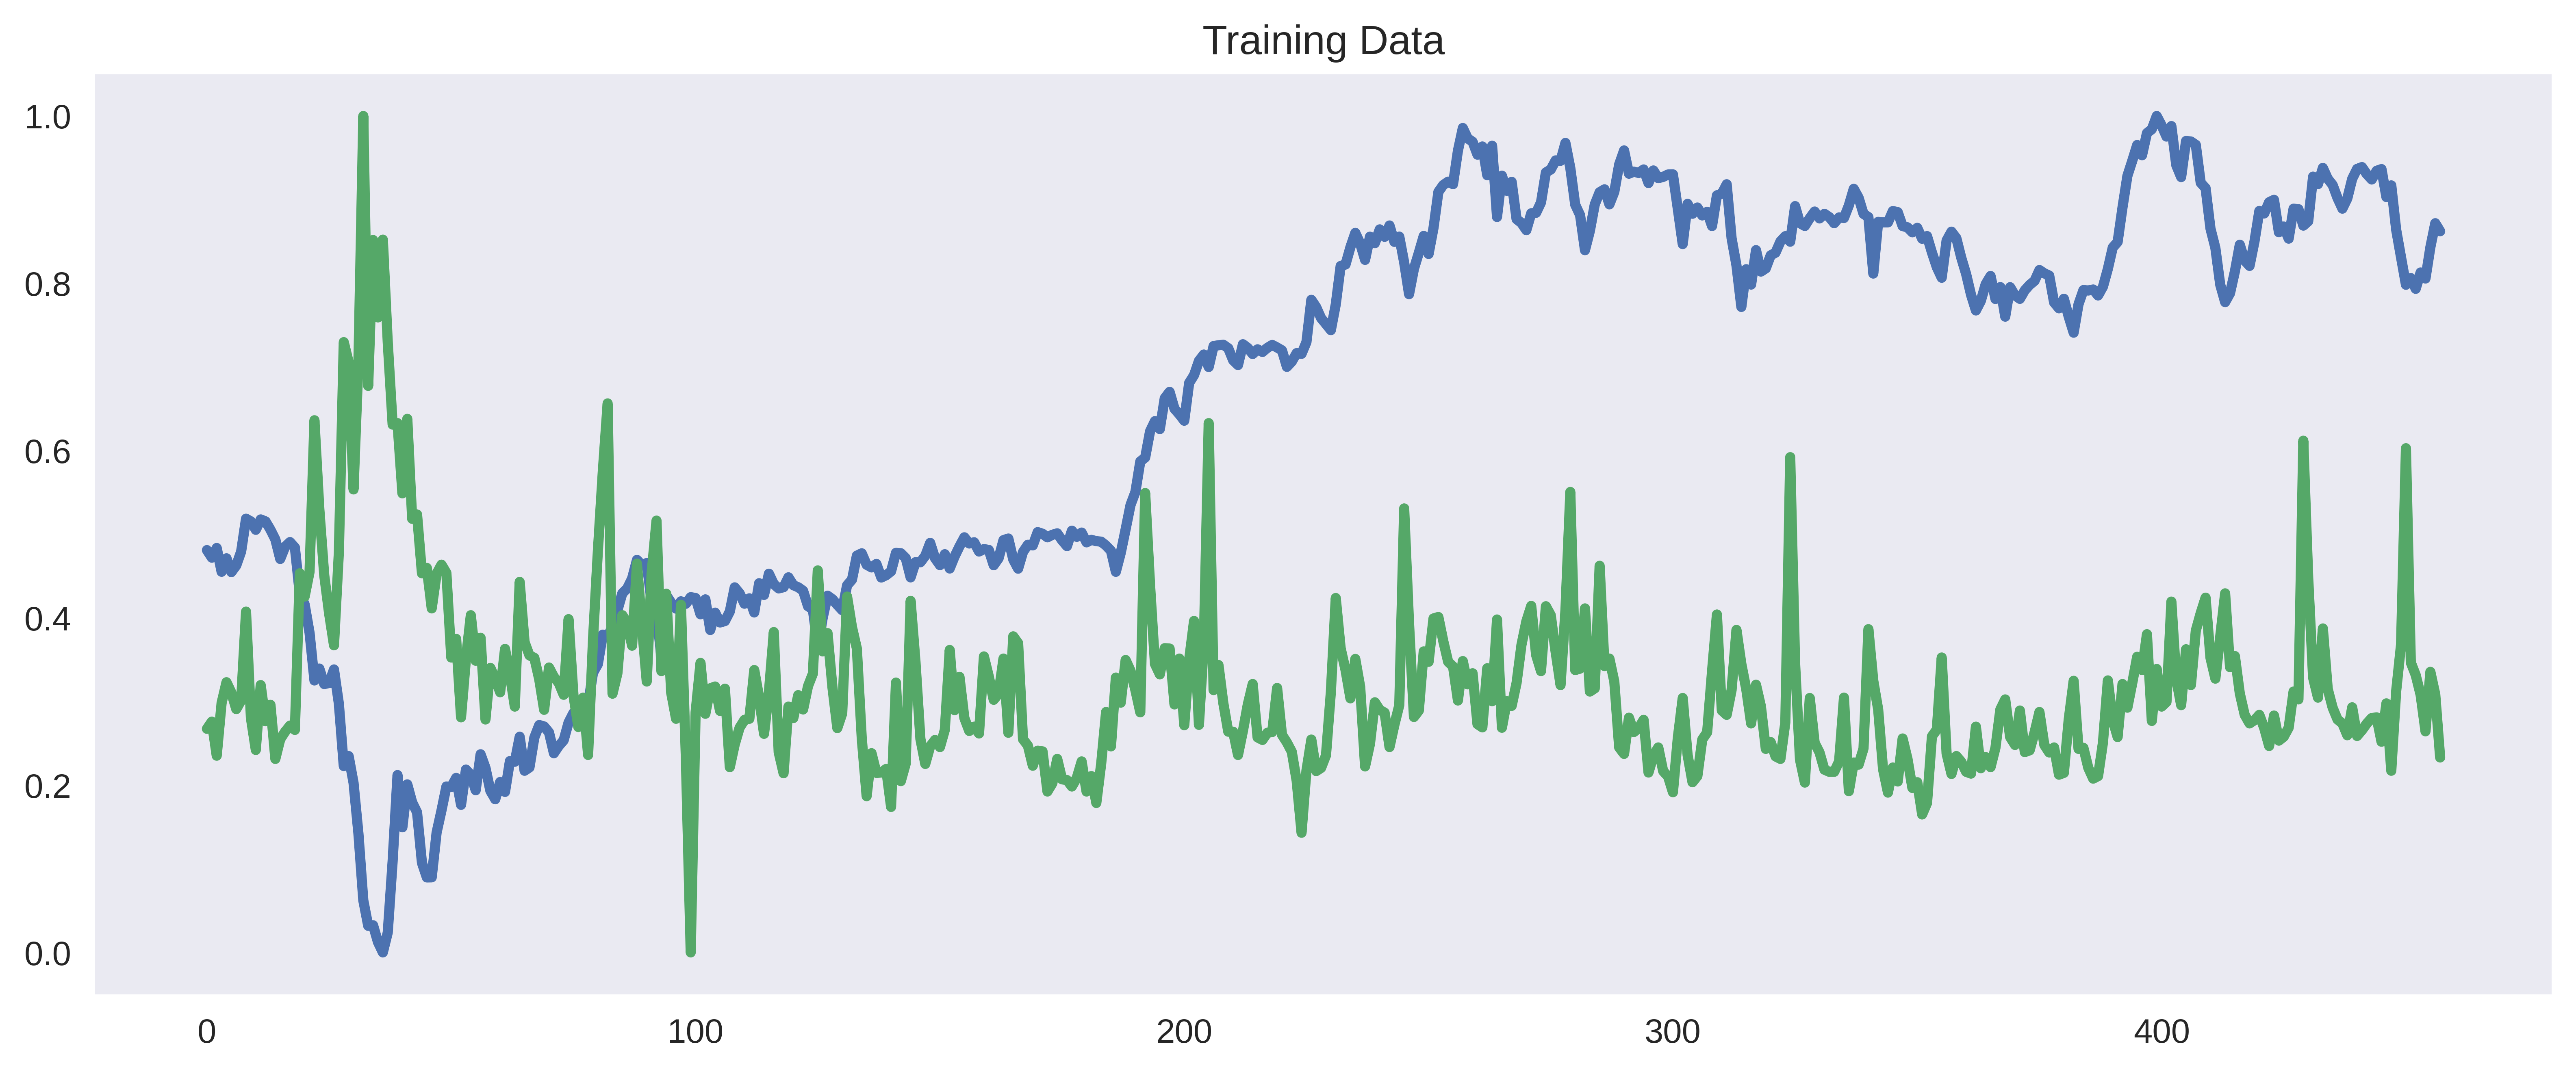

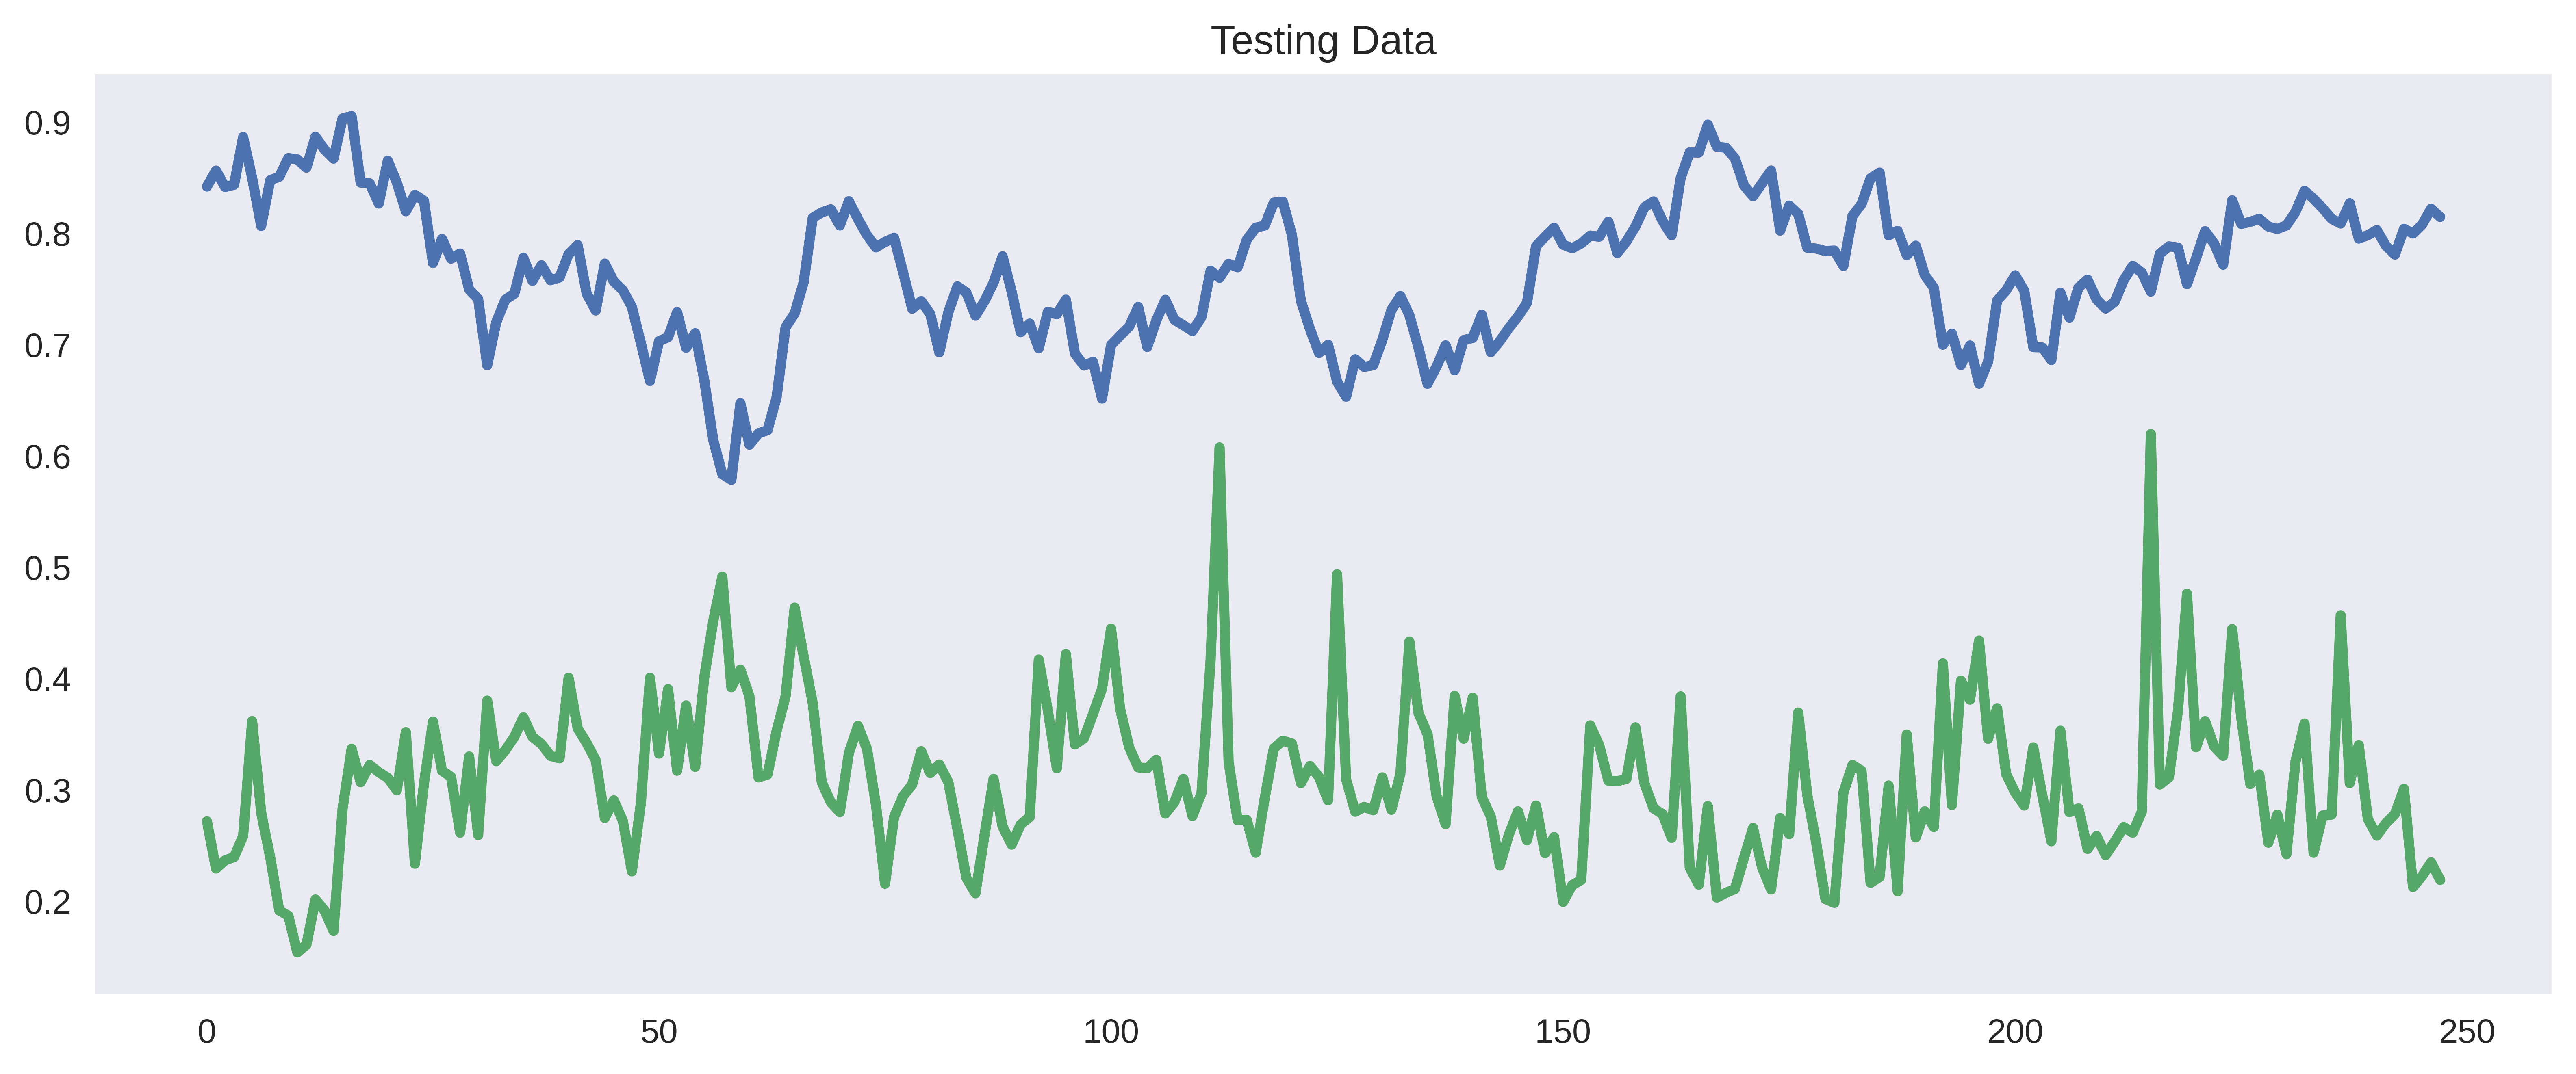

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.8413178399192638


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.49094833],
       [0.48198837],
       [0.49448848],
       [0.46508715],
       [0.47965112],
       [0.46426525],
       [0.47258181],
       [0.48815879],
       [0.52206263],
       [0.523353  ],
       [0.51503866],
       [0.52424843],
       [0.52346886],
       [0.51328845],
       [0.5043737 ],
       [0.48122592],
       [0.49494386],
       [0.50001203],
       [0.49392365],
       [0.43450042],
       [0.42330835],
       [0.38988427],
       [0.32904453],
       [0.34634015],
       [0.33133573],
       [0.33408967],
       [0.3509333 ],
       [0.30781505],
       [0.22791   ],
       [0.24015122],
       [0.2148078 ],
       [0.15151759],
       [0.06484672],
       [0.04687123],
       [0.04150873],
       [0.02537446],
       [0.01039393],
       [0.03732405],
       [0.12238856],
       [0.22093057],
       [0.16402068],
       [0.21009517],
       [0.19356978],
       [0.18200486],
       [0.12668605],
       [0.10973902],
       [0.1115061 ],
       [0.161

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

706

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2020-01-27
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
...,...
701,2022-12-09
702,2022-12-12
703,2022-12-13
704,2022-12-14


In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2020-01-27,0.481019
1,2020-01-28,0.471967
2,2020-01-29,0.483562
3,2020-01-30,0.455111
4,2020-01-31,0.471221
...,...,...
701,2022-12-09,0.803851
702,2022-12-12,0.799694
703,2022-12-13,0.807665
704,2022-12-14,0.821928


In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2020-01-27,0.481019,0.490948
1,2020-01-28,0.471967,0.481988
2,2020-01-29,0.483562,0.494488
3,2020-01-30,0.455111,0.465087
4,2020-01-31,0.471221,0.479651
...,...,...,...
701,2022-12-09,0.803851,0.798798
702,2022-12-12,0.799694,0.797860
703,2022-12-13,0.807665,0.805149
704,2022-12-14,0.821928,0.818373


In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

,Date,Close,Volume,Target
0,2020-01-27,23343.509766,62400000,23215.710938
1,2020-01-28,23215.710938,64400000,23379.400391
2,2020-01-29,23379.400391,54900000,22977.750000
3,2020-01-30,22977.750000,69600000,23205.179688
4,2020-01-31,23205.179688,75400000,22971.939453
...,...,...,...,...
702,2022-12-12,27842.330078,49600000,27954.849609
703,2022-12-13,27954.849609,51900000,28156.210938
704,2022-12-14,28156.210938,54800000,28051.699219
705,2022-12-15,28051.699219,51100000,27527.119141


In [92]:
price_volume_df = data
price_volume_df

,Date,Close,Volume,Target
0,2020-01-27,23343.509766,62400000,23215.710938
1,2020-01-28,23215.710938,64400000,23379.400391
2,2020-01-29,23379.400391,54900000,22977.750000
3,2020-01-30,22977.750000,69600000,23205.179688
4,2020-01-31,23205.179688,75400000,22971.939453
...,...,...,...,...
702,2022-12-12,27842.330078,49600000,27954.849609
703,2022-12-13,27954.849609,51900000,28156.210938
704,2022-12-14,28156.210938,54800000,28051.699219
705,2022-12-15,28051.699219,51100000,27527.119141


In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.33435098e+04, 6.24000000e+07],
       [2.32157109e+04, 6.44000000e+07],
       [2.33794004e+04, 5.49000000e+07],
       ...,
       [2.81562109e+04, 5.48000000e+07],
       [2.80516992e+04, 5.11000000e+07],
       [2.75271191e+04, 8.38000000e+07]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.48101934]),
 array([0.47196668]),
 array([0.48356166]),
 array([0.45511066]),
 array([0.4712207]),
 array([0.45469907]),
 array([0.46267869]),
 array([0.47932289]),
 array([0.51856768]),
 array([0.51533693]),
 array([0.50527833]),
 array([0.51769082]),
 array([0.51531922]),
 array([0.50539233]),
 array([0.49375059]),
 array([0.47041467]),
 array([0.48507037]),
 array([0.49062748]),
 array([0.48408158]),
 array([0.42873589]),
 array([0.41604075]),
 array([0.38218441]),
 array([0.32514296]),
 array([0.33938928]),
 array([0.32087653]),
 array([0.32210411]),
 array([0.33832952]),
 array([0.29728978]),
 array([0.22284265]),
 array([0.23476842]),
 array([0.20281758]),
 array([0.14215219]),
 array([0.06220896]),
 array([0.03181982]),
 array([0.03249206]),
 array([0.01230555]),
 array([0.]),
 array([0.0237262]),
 array([0.10905222]),
 array([0.21206656]),
 array([0.14958768]),
 array([0.20093118]),
 array([0.17936476]),
 array([0.16746721]),
 array([0.10714395]),
 array([0.08966965])

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((494, 1, 1), (212, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
13/13 [==============================] - 12s 146ms/step - loss: 0.3834 - val_loss: 0.4979
Epoch 2/20
13/13 [==============================] - 0s 14ms/step - loss: 0.1556 - val_loss: 0.0118
Epoch 3/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0365 - val_loss: 0.0203
Epoch 4/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0266 - val_loss: 0.0159
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0180 - val_loss: 0.0051
Epoch 6/20
13/13 [==============================] - 0s 16ms/step - loss: 0.0142 - val_loss: 0.0077
Epoch 7/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0113 - val_loss: 0.0030
Epoch 8/20
13/13 [==============================] - 0s 15ms/step - loss: 0.0080 - val_loss: 0.0015
Epoch 9/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0057 - val_loss: 0.0011
Epoch 10/20
13/13 [==============================] - 0s 14ms/step - loss: 0.0039 - val_loss: 0.0010
Epoch 1

In [102]:
# Make prediction
predicted = model.predict(X)

23/23 [==============================] - 1s 4ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.46562093,
 0.45719978,
 0.46799183,
 0.44160637,
 0.45650733,
 0.44122705,
 0.4485936,
 0.4640404,
 0.50089806,
 0.49784064,
 0.48834836,
 0.50006783,
 0.49782392,
 0.48845577,
 0.47751927,
 0.45575935,
 0.4694,
 0.4745945,
 0.46847692,
 0.41743356,
 0.40589666,
 0.375441,
 0.3251515,
 0.33759165,
 0.32144156,
 0.32250834,
 0.3366635,
 0.30105963,
 0.23815028,
 0.24808311,
 0.22159518,
 0.17238154,
 0.10966399,
 0.08645179,
 0.08696157,
 0.071726955,
 0.06251389,
 0.08032751,
 0.14612125,
 0.22922225,
 0.17833784,
 0.22004358,
 0.20240243,
 0.19274667,
 0.14461993,
 0.13093612,
 0.13101724,
 0.17332605,
 0.19464928,
 0.21793732,
 0.21750286,
 0.22640693,
 0.20000762,
 0.23462668,
 0.22942476,
 0.2142743,
 0.24986714,
 0.23640724,
 0.21372761,
 0.20545933,
 0.22237515,
 0.21263827,
 0.24312642,
 0.24241672,
 0.2675071,
 0.23348434,
 0.23673938,
 0.2666343,
 0.2793231,
 0.27786857,
 0.2718991,
 0.25090498,
 0.2581895,
 0.26392522,
 0.28190002,
 0.29167038,
 0.28907692,
 0.2791727,
 0.

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

,Date
1,2020-01-28
2,2020-01-29
3,2020-01-30
4,2020-01-31
5,2020-02-03
...,...
702,2022-12-12
703,2022-12-13
704,2022-12-14
705,2022-12-15


In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

,Date,predictions
1,2020-01-28,0.465621
2,2020-01-29,0.457200
3,2020-01-30,0.467992
4,2020-01-31,0.441606
5,2020-02-03,0.456507
...,...,...
702,2022-12-12,0.787241
703,2022-12-13,0.782837
704,2022-12-14,0.791286
705,2022-12-15,0.806469


In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

,Date,predictions,Close
1,2020-01-28,0.465621,0.471967
2,2020-01-29,0.457200,0.483562
3,2020-01-30,0.467992,0.455111
4,2020-01-31,0.441606,0.471221
5,2020-02-03,0.456507,0.454699
...,...,...,...
702,2022-12-12,0.787241,0.799694
703,2022-12-13,0.782837,0.807665
704,2022-12-14,0.791286,0.821928
705,2022-12-15,0.806469,0.814525


In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")